## 聚类分析

完成描述性任务和预测性任务

Matplotlib是Python用于绘制2D图形的库，其是pandas用于绘制图表的基础依赖库，pandas可以利用~~ndarray~~DataFrame对象数据组织特点来创建标准图表的高级绘图方法。

In [1]:
from pylab import *
from scipy.cluster.vq import *

In [17]:
# 高数 英语 Python 音乐
list1 = [88,74,96,85]
list2 = [92,99,95,94]
list3 = [91,87,99,95]
list4 = [78,99,97,81]
list5 = [88,78,98,84]
list6 = [100,95,100,92]
data = vstack((list1,list2,list3,list4,list5,list6))

centroids, _ = kmeans(data.astype(float64), 2)
result, _ = vq(data,centroids)
print(result)

[0 1 1 1 0 1]


In [18]:
centroids, _ = kmeans(data.astype(float64), 2)

In [19]:
centroids

array([[ 90.25,  95.  ,  97.75,  90.5 ],
       [ 88.  ,  76.  ,  97.  ,  84.5 ]])

## 小测试

In [52]:
import time
from matplotlib.finance import quotes_historical_yahoo_ochl
from datetime import date
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

%matplotlib inline

In [21]:
start = datetime(2014,1,1)
end = datetime(2014,12,31)
quotesMSFT = quotes_historical_yahoo_ochl('MSFT',start,end)
quotesINTC = quotes_historical_yahoo_ochl('INTC',start,end)
fields = ['date','open','close','high','low','volume']

In [25]:
list1 = [datetime.strftime(date.fromordinal(int(quotesMSFT[i][0])), '%Y-%m-%d') for i in range(len(quotesMSFT))]
list2 = [datetime.strftime(date.fromordinal(int(quotesINTC[i][0])), '%Y-%m-%d') for i in range(len(quotesINTC))]

quotesdfMSFT = pd.DataFrame(quotesMSFT, index=list1, columns=fields)
quotesdfMSFT = quotesdfMSFT.drop(['date'], axis=1)

quotesdfINTC = pd.DataFrame(quotesINTC, index=list2, columns=fields)
quotesdfINTC = quotesdfINTC.drop(['date'], axis=1)

In [30]:
time.strptime(quotesdfINTC.index[0],"%Y-%m-%d")

time.struct_time(tm_year=2014, tm_mon=1, tm_mday=2, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=3, tm_yday=2, tm_isdst=-1)

In [34]:
tempdfMSFT = quotesdfMSFT.copy()
tempdfMSFT['month'] = [time.strptime(tempdfMSFT.index[i], '%Y-%m-%d').tm_mon for i in range(len(tempdfMSFT))]

close_max_MSFT = tempdfMSFT.groupby('month').max().close
listMSFT = [close_max_MSFT[i] for i in range(1,13)]
listMSFT_Index = close_max_MSFT.index

In [35]:
tempdfINTC = quotesdfINTC.copy()
tempdfINTC['month'] = [time.strptime(tempdfINTC.index[i], '%Y-%m-%d').tm_mon for i in range(len(tempdfMSFT))]

close_max_INTC = tempdfINTC.groupby('month').max().close
listINTC = [close_max_INTC[i] for i in range(1,13)]
listINTC_Index = close_max_INTC.index

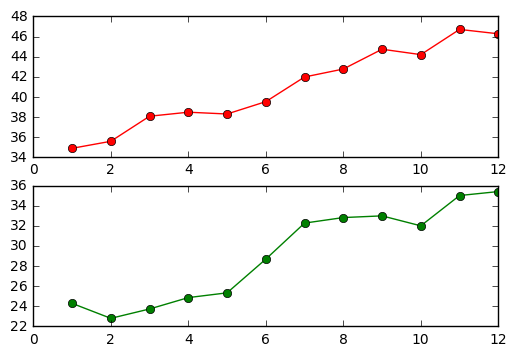

In [39]:
pl.subplot(211)
plt.plot(listMSFT_Index,listMSFT,color='r',marker='o')
pl.subplot(212)
plt.plot(listINTC_Index,listINTC,color='green',marker='o')

## Matplotlib绘图基础

最著名的Python会图库

+ 绘图API——pyplot模块
+ 集成库——pylab模块（包含Numpy和pyplot中的常用函数）

### pyplot绘图

#### 折线图

In [ ]:
# 可口可乐公司近一年月平均收盘价
today = date.today()
start = (today.year-1, today.month, today.day)
quotes_KO = quotes_historical_yahoo_ochl('KO',start,end)
fields = ['date','open','close','high','low','volume']

list1 = [datetime.strftime(date.fromordinal(int(quotes_KO[i][0])), '%Y-%m-%d') for i in range(len(quotes_KO))]
quotes_df_KO = pd.DataFrame(quotes_KO, index=list1, columns=fields)
quotes_df_KO = quotes_df_KO.drop(['date'], axis=1)

In [79]:
# Intel公司近一年月平均收盘价
close_means_INTC = tempdfINTC.groupby('month').mean().close
close_means_INTC

close_means_MSFT = tempdfMSFT.groupby('month').mean().close
close_means_MSFT

month
1     33.524037
2     34.469433
3     36.223538
4     37.291187
5     37.254884
6     38.702968
7     40.436512
8     41.527753
9     43.700024
10    42.554810
11    45.696544
12    44.999704
Name: close, dtype: float64

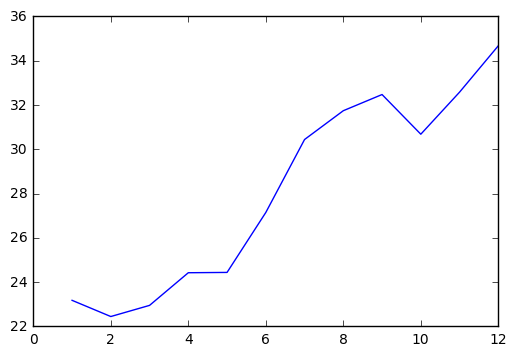

In [58]:
plt.plot(close_means_INTC)
plt.show()

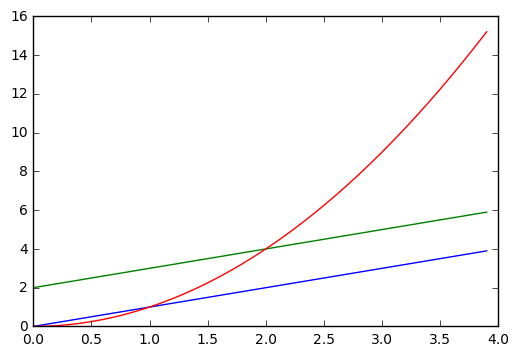

In [59]:
t = np.arange(0.,4.,0.1)
plt.plot(t,t,t,t+2,t,t**2)
plt.show()

In [61]:
help(plt.show)

Help on function show in module matplotlib.pyplot:

show(*args, **kw)
    Display a figure.
    When running in ipython with its pylab mode, display all
    figures and return to the ipython prompt.
    
    In non-interactive mode, display all figures and block until
    the figures have been closed; in interactive mode it has no
    effect unless figures were created prior to a change from
    non-interactive to interactive mode (not recommended).  In
    that case it displays the figures but does not block.
    
    A single experimental keyword argument, *block*, may be
    set to True or False to override the blocking behavior
    described above.



#### 散点图

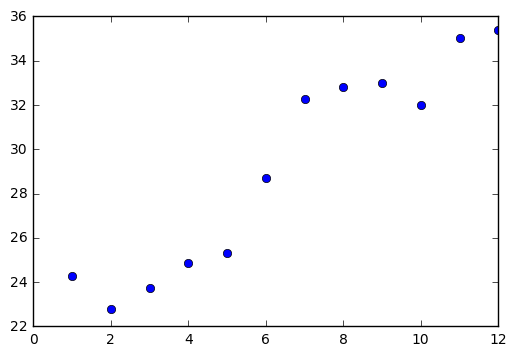

In [63]:
plt.plot(close_max_INTC,'o')
plt.show()

#### 柱状图

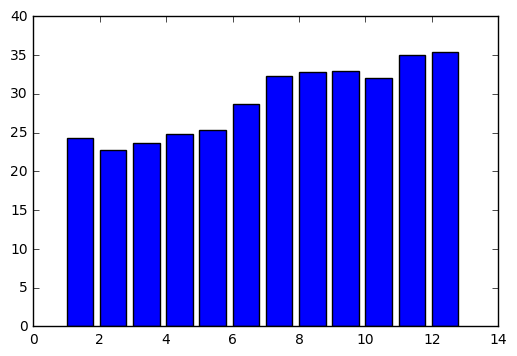

In [68]:
plt.bar(close_max_INTC.index,close_max_INTC)
plt.show()

In [67]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(left, height, width=0.8, bottom=None, hold=None, data=None, **kwargs)
    Make a bar plot.
    
    Make a bar plot with rectangles bounded by:
    
      `left`, `left` + `width`, `bottom`, `bottom` + `height`
            (left, right, bottom and top edges)
    
    Parameters
    ----------
    left : sequence of scalars
        the x coordinates of the left sides of the bars
    
    height : sequence of scalars
        the heights of the bars
    
    width : scalar or array-like, optional
        the width(s) of the bars
        default: 0.8
    
    bottom : scalar or array-like, optional
        the y coordinate(s) of the bars
        default: None
    
    color : scalar or array-like, optional
        the colors of the bar faces
    
    edgecolor : scalar or array-like, optional
        the colors of the bar edges
    
    linewidth : scalar or array-like, optional
        width of bar edge(s). If None, use default
      

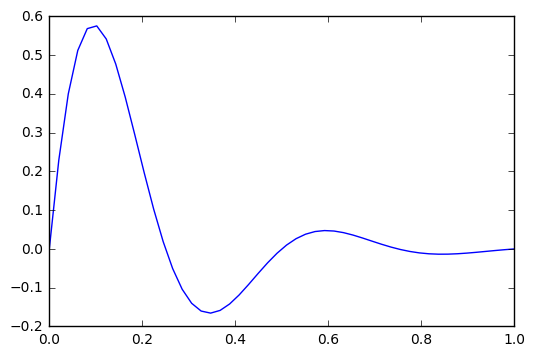

In [65]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 1)
y = np.sin(4 * np.pi * x) * np.exp(-5 * x)
plt.plot(x, y)
plt.show()

### pylab绘图

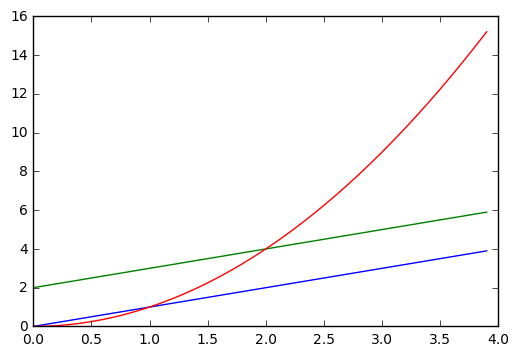

In [70]:
pl.plot(t,t,t,t+2,t,t**2)
pl.show()

### [Difference](http://stackoverflow.com/questions/16849483/which-is-the-recommended-way-to-plot-matplotlib-or-pylab)

pylab 相比 pyplot 来说，批量导入bulk了一些其他的包，使得导入之后可以直接实现类似Matlab的功能，没有多大差别。

另外，pylab多用来实现交互性更强的功能。

In [71]:
# pylab
from matplotlib.pylab import *
import matplotlib.pylab
__doc__ = matplotlib.pylab.__doc__

In [ ]:
# matplotlib.pylab
# https://github.com/matplotlib/matplotlib/blob/master/lib/matplotlib/pylab.py
from matplotlib import cbook, mlab, pyplot as plt
from matplotlib.pyplot import *

from numpy import *
from numpy.fft import *
from numpy.random import *
from numpy.linalg import *

import numpy as np
import numpy.ma as ma

## Matplotlib图像属性控制

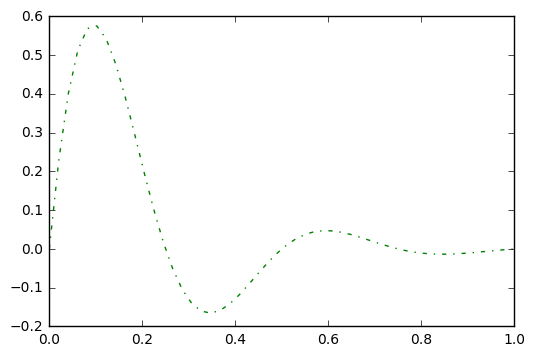

In [74]:
plt.plot(x, y, 'g-.')
plt.show()

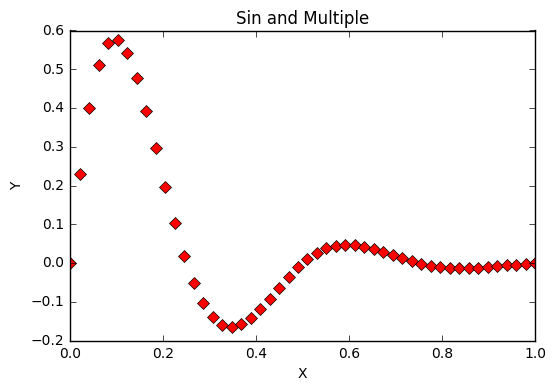

In [75]:
plt.plot(x, y, 'rD')
plt.title('Sin and Multiple')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

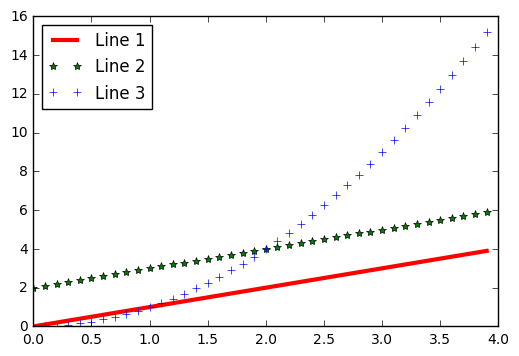

In [77]:
pl.plot(t,t,color='r',linestyle='-',linewidth=3,label='Line 1')
pl.plot(t,t+2,color='g',linestyle='',marker='*',linewidth=3,label='Line 2')
pl.plot(t,t**2,color='b',linestyle='',marker='+',linewidth=3,label='Line 3')
pl.legend(loc='upper left')

#### 子图

**subplot**

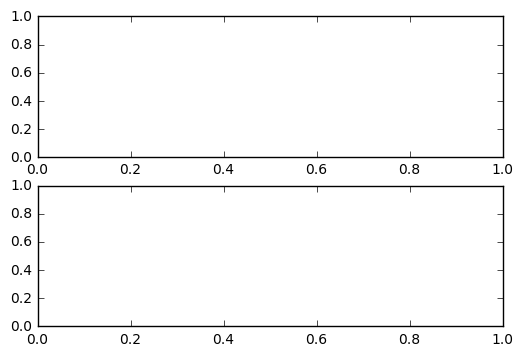

In [78]:
plt.subplot(2,1,1)
plt.subplot(2,1,2)
plt.show()

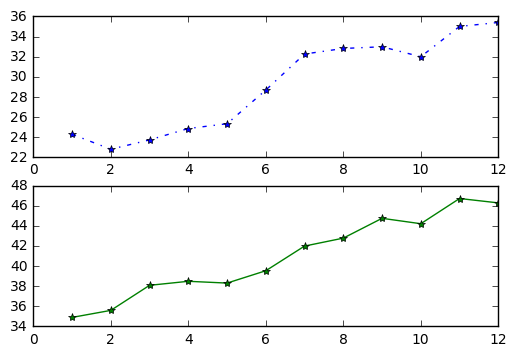

In [191]:
plt.subplot(2,1,1)
plt.plot(close_max_INTC,'b-.*')
plt.subplot(2,1,2)
plt.plot(close_max_MSFT,color='g',marker='*')
plt.show()

**axes**

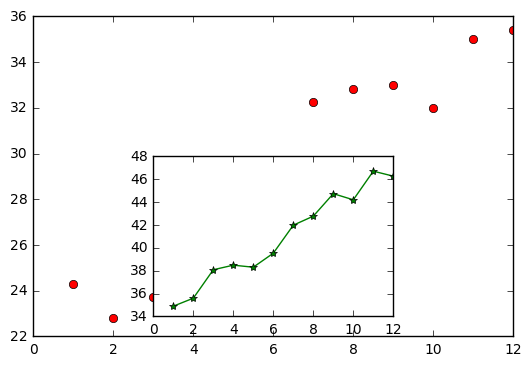

In [83]:
plt.axes([.1,.1,.8,.8])
plt.plot(close_max_INTC,'ro')
plt.axes([.3,.15,.4,.4])
plt.plot(close_max_MSFT,color='g',marker='*')
plt.show()

## pandas作图

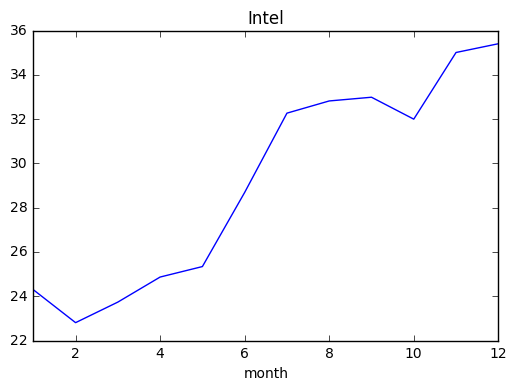

In [185]:
close_max_INTC.plot()
plt.title('Intel')

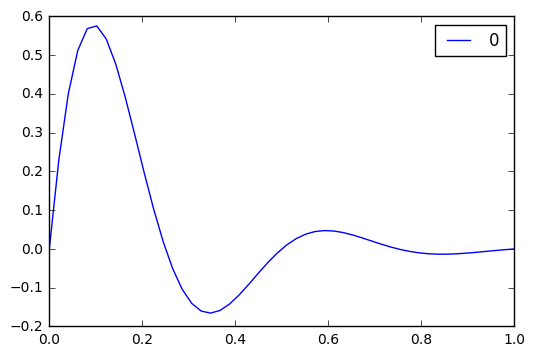

In [87]:
pd.DataFrame(y,index=x).plot()

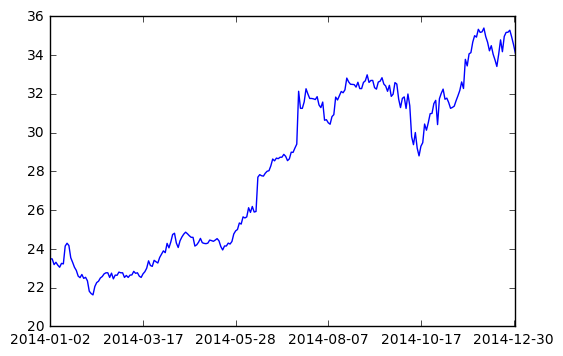

In [89]:
# Intel公司近一年收盘价折线图
quotesdfINTC.close.plot()

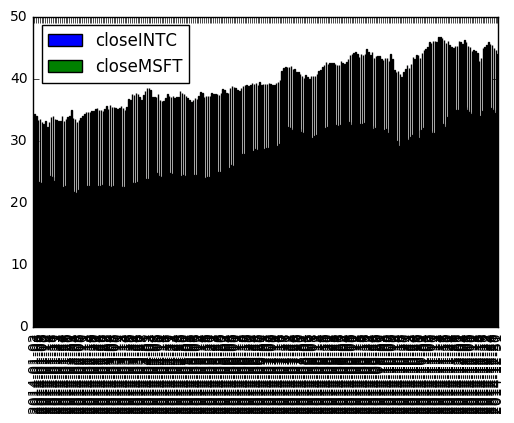

In [92]:
quotes_df = pd.DataFrame()
quotes_df['closeINTC'] = quotesdfINTC.close
quotes_df['closeMSFT'] = quotesdfMSFT.close
quotes_df.plot(kind='bar')

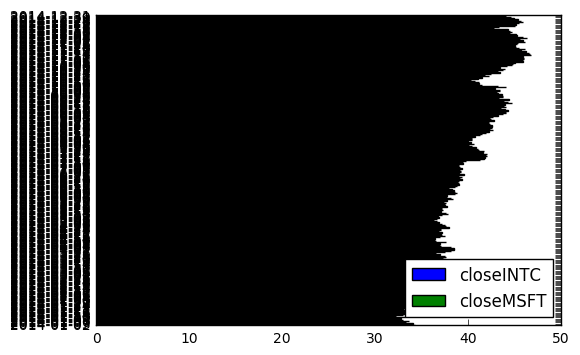

In [93]:
quotes_df.plot(kind='barh')

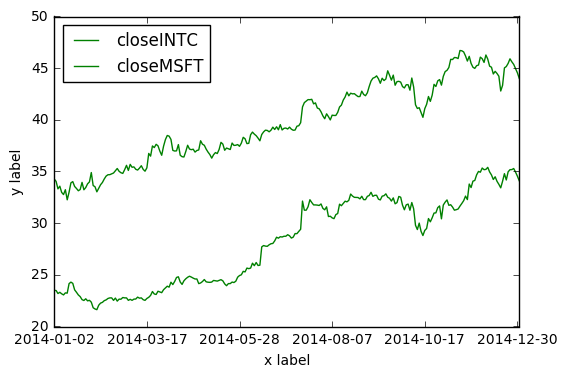

In [105]:
ax = quotes_df.plot(kind='line',color='g')
ax.set(xlabel="x label", ylabel="y label")

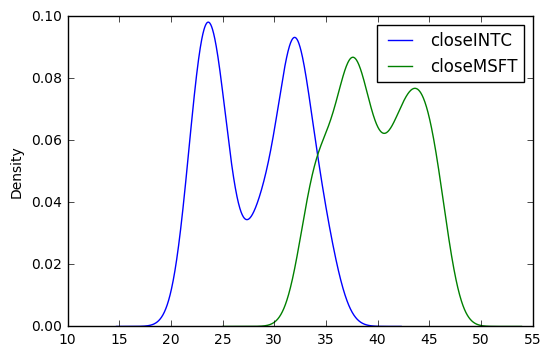

In [106]:
quotes_df.plot(kind='kde')

## 数据存取Data Access

In [109]:
quotesdfINTC.to_csv('stockIntel.csv')

In [111]:
result = pd.read_csv('stockIntel.csv')
result

,Unnamed: 0,open,close,high,low,volume
0,2014-01-02,23.483164,23.492273,23.519599,23.200781,31833300.0
1,2014-01-03,23.556036,23.483164,23.592472,23.319200,27796700.0
2,2014-01-06,23.474054,23.191672,23.492273,23.182565,28682300.0
3,2014-01-07,23.264547,23.310091,23.437618,23.200781,19665100.0
4,2014-01-08,23.355635,23.164346,23.419399,23.045927,29680500.0
5,2014-01-09,23.155238,23.055037,23.273655,23.000384,20878000.0
6,2014-01-10,23.228109,23.255437,23.546926,23.228109,30588800.0
7,2014-01-13,23.346527,23.228110,23.674454,23.155237,40274500.0
8,2014-01-14,23.692672,24.148125,24.184560,23.592472,74142900.0
9,2014-01-15,24.339414,24.293870,24.703779,24.239217,58277700.0


In [114]:
quotesdfINTC.to_excel('stockIntel.xls',sheet_name='Intel')

## Python的理工类应用

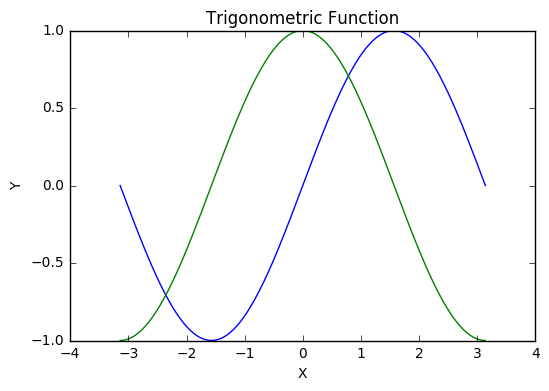

In [182]:
x = np.linspace(-np.pi,np.pi,256)
s = sin(x)
c = cos(x)
pl.title('Trigonometric Function')
pl.xlabel('X')
pl.ylabel('Y')
pl.plot(x,s)
pl.plot(x,c)
pl.show()

C:\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


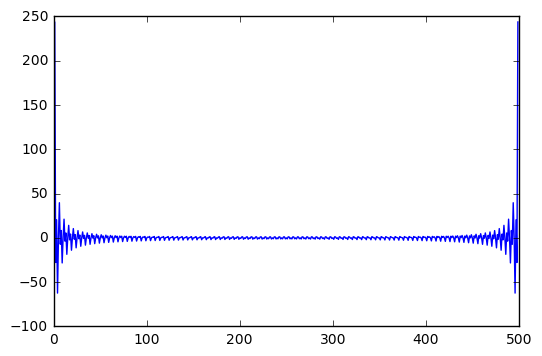

In [119]:
# 傅里叶变换
import scipy as sp
listA = sp.ones(500)
listA[100:300] = -1
f = sp.fft(listA)
pl.plot(f)
plt.show()

#### Biopython

## Python的人文社科类应用

## Practice

In [145]:
u_data = pd.read_table('ml-100k/u.data', sep='\t', names=['user_id','item_id','rating','timestamp'])
u_user = pd.read_table('ml-100k/u.user', sep='|', names=['user_id','age','gender','occupation','zip_code'])

In [146]:
u_item = pd.read_table('ml-100k/u.item', sep='|', encoding='latin-1', names=['movie_id','release_date','video_release_date','IMDb_URL','unknown','Action','Adventure','Animation','Children\'s','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'])

In [167]:
user = u_user[['user_id', 'gender']].merge(u_data[['user_id','rating']],how='inner', on='user_id').drop(['user_id'], axis=1)
user = pd.pivot_table(user,index='gender',aggfunc=np.std)
user
#user.drop(['user_id'], axis=1)

,rating
gender,
F,1.170951
M,1.109556


In [164]:
help(pd.pivot_table)

Help on function pivot_table in module pandas.tools.pivot:

pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
    Create a spreadsheet-style pivot table as a DataFrame. The levels in the
    pivot table will be stored in MultiIndex objects (hierarchical indexes) on
    the index and columns of the result DataFrame
    
    Parameters
    ----------
    data : DataFrame
    values : column to aggregate, optional
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The list
        can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed, it
        is being used as the same manner as column values.
    columns : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The list
        can contain 

## 示例代码

In [179]:
#from numpy import vstack
#import numpy
from scipy.cluster.vq import kmeans,vq
from matplotlib.finance import quotes_historical_yahoo_ochl
from datetime import datetime
start = datetime(2014,7,1)
end = datetime(2014,9,30)
listDji = ['AXP','BA','CAT','CSCO','CVX','DD','DIS','GE','GS','HD','IBM',
'INTC','JNJ','JPM','KO','MCD','MMM','MRK','MSFT','NKE','PFE','PG','T','TRV',
'UNH','UTX','V','VZ','WMT','XOM']
# quotes = [ [0 for col in range(90)] for row in range(30)] 
listTemp = [ [0 for col in range(90)] for row in range(30)]
for i in range(30):
    quotes[i] = quotes_historical_yahoo_ochl(listDji[i], start, end)
days = len(quotes[0])
for i in range(30):
    for j in range(days-1):
        if (quotes[i][j][2] and quotes[i][j+1][2] and (quotes[i][j+1][2] >= quotes[i][j][2])):
            listTemp[i][j] = 1.0   
        else:
            listTemp[i][j] = -1.0
data = vstack(listTemp)
centroids,_ = kmeans(data,4)   #float or double is supported
result,_= vq(data,centroids)
print(result)

[2 1 1 2 0 0 0 0 3 0 2 2 0 3 2 0 2 2 2 3 2 0 2 0 0 1 3 2 0 0]


## Quiz

In [192]:
close_max_MSFT.values

array([ 34.897743,  35.596135,  38.086285,  38.48582 ,  38.308184,
        39.533972,  41.985545,  42.775053,  44.742913,  44.206225,
        46.710773,  46.275812])

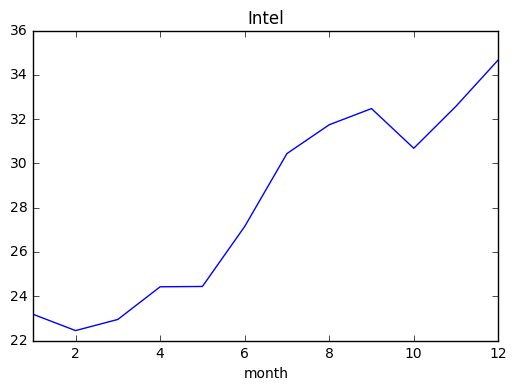

In [198]:
close_means_INTC.plot(title='Intel')

In [194]:
type(close_means_INTC)

pandas.core.series.Series

In [201]:
quotesdfINTC.close - quotesdfINTC.open

2014-01-02    0.009109
2014-01-03   -0.072872
2014-01-06   -0.282382
2014-01-07    0.045544
2014-01-08   -0.191289
2014-01-09   -0.100201
2014-01-10    0.027328
2014-01-13   -0.118417
2014-01-14    0.455453
2014-01-15   -0.045544
2014-01-16   -0.091089
2014-01-17    0.446343
2014-01-21   -0.182182
2014-01-22   -0.072873
2014-01-23   -0.036437
2014-01-24   -0.063763
2014-01-27   -0.045546
2014-01-28    0.173073
2014-01-29   -0.063763
2014-01-30   -0.009109
2014-01-31    0.081982
2014-02-03   -0.500998
2014-02-04   -0.154854
2014-02-05   -0.165528
2014-02-06    0.358641
2014-02-07    0.009194
2014-02-10    0.165527
2014-02-11    0.110350
2014-02-12    0.036783
2014-02-13    0.248291
                ...   
2014-11-18    0.488689
2014-11-19   -0.319528
2014-11-20    1.701014
2014-11-21   -0.366516
2014-11-24    0.338324
2014-11-25   -0.037592
2014-11-26    0.498089
2014-11-28    0.197354
2014-12-01   -0.037592
2014-12-02    0.394708
2014-12-03   -0.234946
2014-12-04    0.056384
2014-12-05 

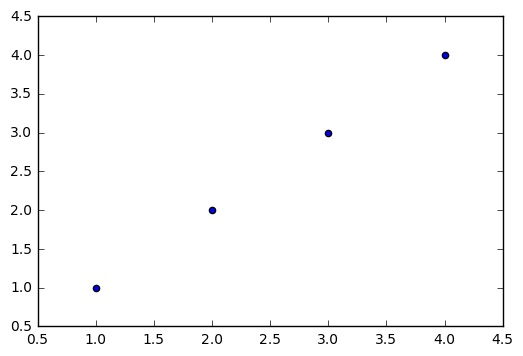

In [200]:
plt.scatter([1,2,3,4],[1,2,3,4])